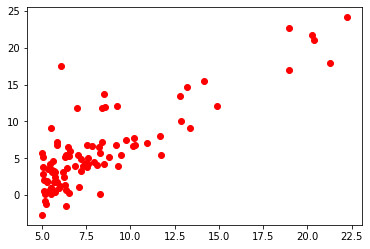

In [1]:
import numpy as np
import math 
import matplotlib.pyplot as plt 
from sklearn.metrics import mean_squared_error


with open('data2.txt') as f:
    x, y = [], [] 
    for line in f:
        elements_list = line.split(',')        # example: ['6.203', '2.2377\n']
        x.append(float(elements_list[0]))
        y.append(float((elements_list[1].splitlines())[0]))

plt.scatter(x, y, c='r')

Theta is: [-4.6529571  1.2578021]


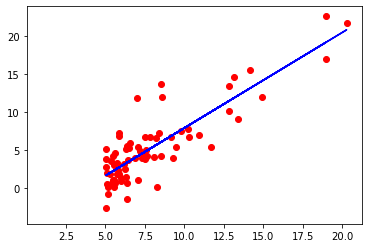

In [3]:
from sklearn.model_selection import train_test_split
# Normal Equation : Theta = (X'X)^-1 . (X'Y)
# hyp_theta(x) = (theta)' X
# Equations for reference :
#     hyp_theta(x) = (theta)' X
#     cost (to be minimized) = 1/2m * sum(hyp(xi - yi)^2)
#     where hyp(x) = Theta0x0 + Theta1x1 + ...
x_np = np.array(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

x_np = np.c_[np.ones(len(x_train)), x_train] 
xtx = np.dot(np.transpose(x_np), x_np)
theta = np.dot(np.linalg.pinv(xtx), np.dot(np.transpose(x_np), y_train))
print ('Theta is:', theta)

y_predicted = (theta[1]*x_np) + theta[0]
plt.scatter(x_train, y_train, c='r')
plt.plot(x_np, y_predicted, c='b')

plt.show()

[-4.01494668  1.20892318] BATCH <class 'numpy.ndarray'>


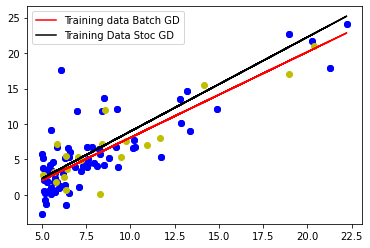

[-4.36524232  1.33124109] <class 'numpy.ndarray'>


In [4]:
def linear_regression_batch (file_x, file_y, params, alpha, max_iter, test = 0, lr_plot_call = 0):
    # To compute params for linear regression considering the whole batch
    iteration = 0
    num_samples = len(file_x)
    batch_cost = []

    while iteration < max_iter:

        y_pred_list = []
        for x, y in zip(file_x, file_y):
            hypothesis = np.dot(params, np.array([1.0, x]))
            y_pred_list.append(hypothesis)
            gradient = np.array([1.0, x]) * (y - hypothesis)  # np.array([1.0, x]) = X'
            params += alpha * gradient/num_samples   # parameters updated!
            cost = (np.sum((y-hypothesis)**2 )/ (2 * num_samples))
            batch_cost.append(cost)
            if math.fabs(params[0]) < 0.0001 and math.fabs(params[1]) < 0.0001:
                # condition for termination -> due to insignificant change in gradient
                break          
        iteration += 1
    
    line = np.dot(params[1], file_x) + params[0]
    
    if not lr_plot_call:
        # if not test:
        plt.plot(file_x, line, c='r', label ="Training data Batch GD")
        plt.scatter(file_x, file_y, c='b')       
        # else:
        #     test_ data plot
    print(params, "BATCH", type(params))        
    return params, batch_cost

def linear_regression_stochastic(x_1, y_1, learning_rate, epoch, test = 0, lr_plot_call = 0):
    # y = w1*x + w0
    N = len(x_1)
    w1_new, w0_new = np.random.rand(1), np.random.rand(1)   # initialization
    # params = [0, 0]
    cost_stoc = []
    
    for i in range(epoch):
        index = np.random.randint(N)
        x = x_1[index:index+1]
        y = y_1[index:index+1]
        y_new = np.dot(w1_new, x) + w0_new    # y_predicted = (w1_new * x) + w0_new
        cost = ((y-y_new)**2 )/2
        cost_stoc.append(cost)
        w1_gradient = -(1)*np.dot(x,(y-y_new))
        w0_gradient = -(1)*(y-y_new )    # d/dx(MSE) = -2/N*sum(y-(w1x+w0)); therefore for RMSE gradient = -1/N*sum(y-y')
        w0_new = w0_new - (learning_rate * w0_gradient)
        w1_new = w1_new - (learning_rate * w1_gradient)

# Attempt to prevent NaN values' overflow on plotting Learning rate vs cost for stochastic GD
#         y_new = np.round((np.dot(w1_new, x) + w0_new),5)   # y_predicted = (w1_new * x) + w0_new
#         cost = np.round((((y-y_new)**2 )/2),2)
#         cost_stoc.append(cost)
#         w1_gradient = np.round((-(1)*np.dot(x,(y-y_new))),5)
#         w0_gradient = np.round((-(1)*(y-y_new)),5)    # d/dx(MSE) = -2/N*sum(y-(w1x+w0)); therefore for RMSE gradient = -1/N*sum(y-y')
#         w0_new = np.round((w0_new - (learning_rate * w0_gradient)),5)
#         w1_new = np.round((w1_new - (learning_rate * w1_gradient)),5)

        if math.fabs(w0_gradient) < 0.0001 and math.fabs(w1_gradient) < 0.0001:
            # condition for termination - due to insignificant change in gradient
            break
    
    params = np.concatenate((w0_new, w1_new),axis=0)

    if not lr_plot_call:
        # if not test:    
        plt.scatter(x_1, y_1, c='b')
        line = w1_new*x_1 + w0_new
        plt.plot(x_1, line, c='k', label = 'Training Data Stoc GD')    
        plt.scatter(x_test, y_test, c='y')
        plt.legend()
        plt.show()
        # else:
        #     test_ data plot
    print(params, type(params))    
    return params, cost_stoc

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

params_0 = np.array([2.0, 16.0])

alpha_batch = 1e-2
learning_rate = 0.01
max_iter = 5000

params_batch, cost_batch=\
    linear_regression_batch(x_train, y_train, params_0, alpha_batch, max_iter)
    
params_stoc, cost_stoc =\
    linear_regression_stochastic(x_train, y_train, learning_rate, max_iter)

# params_batch, cost_batch=\
#     linear_regression_batch(x_test, y_test, learning_rate, max_iter, test= 1)    
# params_stoc, cost_stoc =\
#     linear_regression_stochastic(x_test, y_test, learning_rate, max_iter, test= 1)  


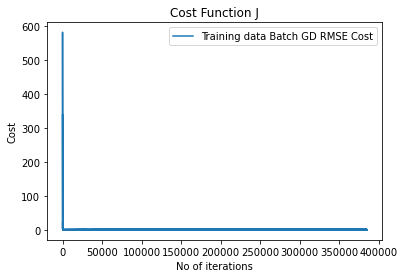

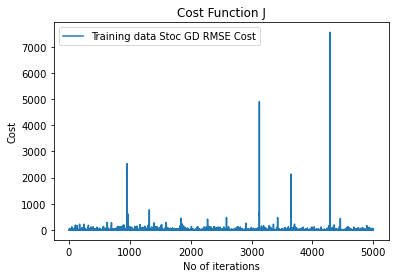

In [5]:
plt.title('Cost Function')
plt.xlabel('No of iterations')
plt.ylabel('Cost')
plt.plot(cost_batch, label = "Training data Batch GD RMSE Cost")
plt.legend()
plt.show()

plt.title('Cost Function')
plt.xlabel('No of iterations')
plt.ylabel('Cost')
plt.plot(cost_stoc, label = "Training data Stoc GD RMSE Cost")
plt.legend()
plt.show()

[-4.08557485  1.23330751] BATCH <class 'numpy.ndarray'>
[-4.08523429  1.2329496 ] BATCH <class 'numpy.ndarray'>
[-4.0848973   1.23259096] BATCH <class 'numpy.ndarray'>
[-4.08456365  1.23223166] BATCH <class 'numpy.ndarray'>
[-4.0842331   1.23187174] BATCH <class 'numpy.ndarray'>
[-4.08390539  1.23151127] BATCH <class 'numpy.ndarray'>
[-4.08358027  1.23115031] BATCH <class 'numpy.ndarray'>
[-4.08325746  1.23078892] BATCH <class 'numpy.ndarray'>
[-4.08293667  1.23042717] BATCH <class 'numpy.ndarray'>
[-4.0826176   1.23006513] BATCH <class 'numpy.ndarray'>
[-4.08229992  1.22970286] BATCH <class 'numpy.ndarray'>
[-4.08198332  1.22934043] BATCH <class 'numpy.ndarray'>
[-4.08166744  1.22897792] BATCH <class 'numpy.ndarray'>
[-4.08135193  1.2286154 ] BATCH <class 'numpy.ndarray'>
[-4.08103642  1.22825295] BATCH <class 'numpy.ndarray'>
[-4.08072051  1.22789066] BATCH <class 'numpy.ndarray'>
[-4.0804038  1.2275286] BATCH <class 'numpy.ndarray'>
[-4.08008589  1.22716686] BATCH <class 'numpy.ndar

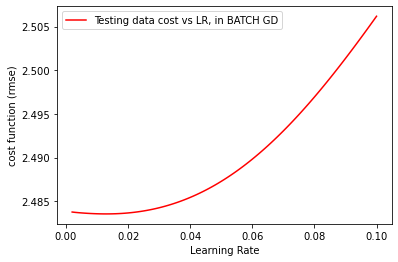

In [6]:
learning_rates, learning_rates_stoc = [], []
rmse_batch_list, rmse_stoch_list = [], []
for learning_rate in np.arange(0.1, 0.001, -0.001):
    learning_rates.append(learning_rate)
   
    params_batch, cost_batch=\
     linear_regression_batch(x_train, y_train, params_0, learning_rate, max_iter, lr_plot_call = 1)
    y_predicted = params_batch[0] + np.dot(params_batch[1], x_test)    
    rmse_batch = math.sqrt(mean_squared_error(y_test, y_predicted))
    rmse_batch_list.append(rmse_batch)
    

#     params_stoch, cost_stoch=\
#       linear_regression_stochastic(x_train, y_train, learning_rate, max_iter, lr_plot_call = 1)    
#     y_predicted_stoch = params_stoch[0] + np.dot(params_stoch[1], x_test)
#     rmse_stoch = math.sqrt(mean_squared_error(y_test, y_predicted_stoch))
#     rmse_stoch_list.append(rmse_stoch)
    
plt.plot(learning_rates,  rmse_batch_list, c='r', label = "Testing data cost vs LR, in BATCH GD")
# plt.plot(learning_rates,  rmse_stoch_list, c='k', label = "Testing data cost vs LR, in STOCH GD")
plt.xlabel('Learning Rate')
plt.ylabel('cost function (rmse)')
plt.legend()
plt.show()